In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob

In [2]:
filepaths = glob.glob("./output/*.json")
len(filepaths)

60

In [3]:
results = {}
for fp in filepaths:
    with open(fp) as f:
        s = f.readline()
        result = json.loads(s)
    for k, v in result.items():
        results.setdefault(k, []).append(v)

In [4]:
for k, v in results.items():
    print(f"{k}: {len(v)}")

model_name: 60
framework_name: 60
dataset: 60
task: 60
total_training_time: 60
average_epoch_training_time: 60
average_batch_inference_time: 60
final_training_loss: 60
final_evaluation_accuracy: 60


In [5]:
df = pd.DataFrame(results)
df

,model_name,framework_name,dataset,task,total_training_time,average_epoch_training_time,average_batch_inference_time,final_training_loss,final_evaluation_accuracy
0,MLP,MxNet,MNIST Digits,classification,20.493185,1.938908,1.324089,0.045692,0.976167
1,MLP,Flux,MNIST Digits,classification,46.025788,1.742115,0.629326,0.034840,0.973892
2,MLP,Jax,MNIST Digits,classification,13.655353,0.930064,1.268271,0.040435,0.976162
3,MLP,MxNet,MNIST Digits,classification,24.715667,2.346577,1.355998,0.047379,0.976760
4,MLP,Flux,MNIST Digits,classification,44.407475,1.681759,0.585179,0.032411,0.975277
5,MLP,MxNet,MNIST Digits,classification,22.241300,2.112321,1.390231,0.045434,0.975079
6,MLP,TensorFlow,MNIST Digits,classification,28.023642,2.796689,2.462855,0.030904,0.977500
7,MLP,Flux,MNIST Digits,classification,47.607302,1.838594,0.613901,0.033560,0.975771
8,MLP,TensorFlow,MNIST Digits,classification,23.471544,2.340267,2.344756,0.030759,0.978500
9,MLP,MxNet,MNIST Digits,classification,21.719494,2.049515,1.549564,0.048482,0.976661


In [6]:
dfg = df.drop(["task", "model_name", "dataset"], axis=1).groupby("framework_name").agg(["mean", "std"])

In [7]:
dfg

total_training_time           average_epoch_training_time  \
                              mean       std                        mean   
framework_name                                                             
Flux                     45.931376  1.121406                    1.705928   
Jax                      13.608780  0.163706                    0.940664   
Knet                     33.285538  1.044414                    1.050237   
MxNet                    21.805167  1.361827                    2.066395   
PyTorch                 119.426434  0.550026                   10.357808   
TensorFlow               26.010916  1.716693                    2.595270   

                         average_batch_inference_time            \
                     std                         mean       std   
framework_name                                                    
Flux            0.092562                     0.587983  0.051824   
Jax             0.010416                     1.268923  0.079109   
Knet            0.089717                     0.523519  0.055368   
MxNet           0.129550                     1.387279  0.110723   
PyTorch         0.053340                    19.852377  0.735215   
TensorFlow      0.171930                     2.399611  0.119150   

               final_training_loss           final_evaluation_accuracy  \
                              mean       std                      mean   
framework_name                                                           
Flux                      0.033128  0.002319                  0.975653   
Jax                       0.041566  0.000994                  0.974429   
Knet                      0.040380  0.003255                  0.973149   
MxNet                     0.046674  0.001286                  0.976454   
PyTorch                   0.046923  0.001938                  0.975680   
TensorFlow                0.031089  0.000987                  0.977030   

                          
                     std  
framework_name            
Flux            0.001495  
Jax             0.001032  
Knet            0.001301  
MxNet           0.000650  
PyTorch         0.001179  
TensorFlow      0.000833

In [8]:
from matplotlib.lines import Line2D
from matplotlib import ticker

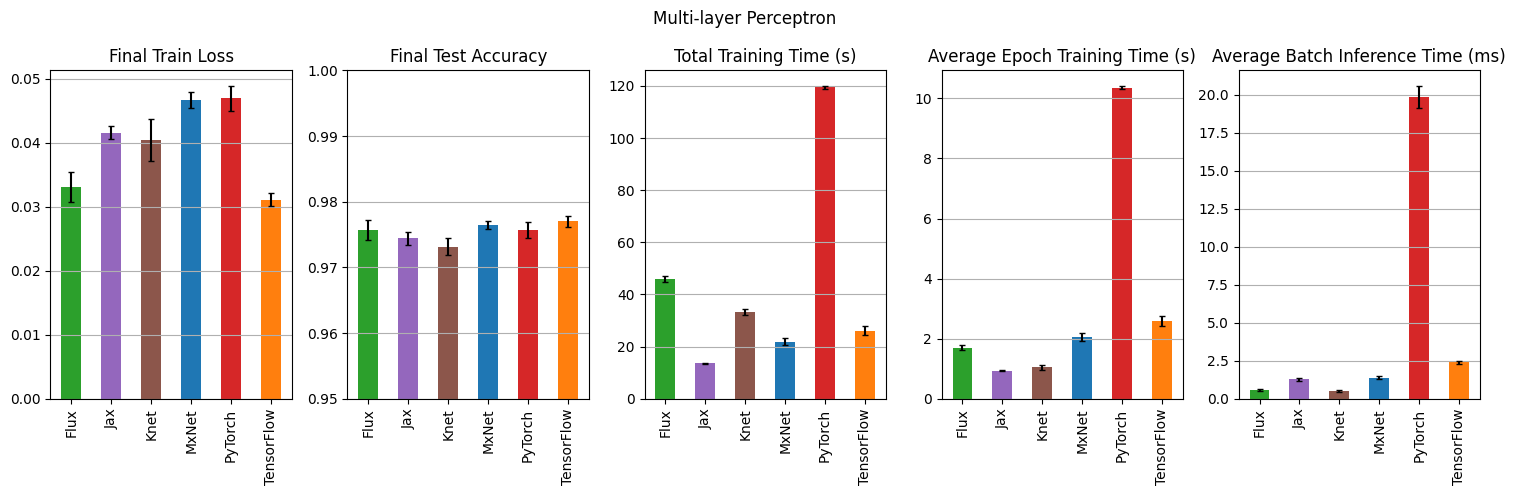

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

xs = np.arange(6)
width = 0.5

column_map = {
    "final_training_loss": "Final Train Loss",
    "final_evaluation_accuracy": "Final Test Accuracy",
    "total_training_time": "Total Training Time (s)",
    "average_epoch_training_time": "Average Epoch Training Time (s)",
    "average_batch_inference_time": "Average Batch Inference Time (ms)"
}

colors = ["C2", "C4", "C5", "C0", "C3", "C1"]

for ax, (metric, label) in zip(axs, column_map.items()):
    subdf = dfg.loc[:, metric]
    means = subdf["mean"]
    stds = subdf["std"]
    labels = subdf.index.tolist()

    ax.bar(xs, means, width=width, yerr=stds, capsize=2, color=colors)
    
    if "accuracy" in metric:
        ax.set_ylim(0.95, 1)
    ax.xaxis.set_major_locator(ticker.FixedLocator(xs))
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(label)
    ax.grid('on', axis='y')
# custom_lines = [
#     Line2D([0], [0], color="C0", lw=4),
#     Line2D([0], [0], color="C1", lw=4)
# ]
# ax.legend(custom_lines, ["In distribution", "Out of distribution"])
plt.suptitle("Multi-layer Perceptron")
plt.tight_layout()
plt.show()